In [1]:
with open("inputs/Day_08.txt") as f:
    raw_puzzle_data = f.read()

In [60]:
import numpy as np

def part_1_solution(raw_data, layer_size=(2, 3)):
    data_as_in_list = list(map(int, raw_data))
    
    layer_x_size, layer_y_size = layer_size
    layer_chunk_size = layer_x_size * layer_y_size
    nbr_of_layers = len(data_as_in_list)//layer_chunk_size
    
    layers = np.array(data_as_in_list).reshape((nbr_of_layers, layer_x_size, layer_y_size))

    min_0_dig_cnt = layer_chunk_size
    result = 0
    for layer in layers:
        cnt_0 = np.count_nonzero(layer == 0)
        if cnt_0 < min_0_dig_cnt:
            cnt_1 = np.count_nonzero(layer == 1)
            cnt_2 = np.count_nonzero(layer == 2)
            result = cnt_1 * cnt_2
            min_0_dig_cnt = cnt_0
    
    return result

In [61]:
test_input = "122456789011"
part_1_solution(test_input, layer_size=(2, 3))

2

In [62]:
print(f"Part 1 solution: {part_1_solution(raw_puzzle_data, layer_size=(6, 25))}")

Part 1 solution: 1920


In [79]:
from PIL import Image

def part_2_solution(raw_data, layer_size=(2, 3)):
    data_as_in_list = list(map(int, raw_data))
    
    layer_x_size, layer_y_size = layer_size
    layer_chunk_size = layer_x_size * layer_y_size
    nbr_of_layers = len(data_as_in_list)//layer_chunk_size
    
    layers = np.array(data_as_in_list).reshape((nbr_of_layers, layer_x_size, layer_y_size))
    final_image = np.full(layer_size, 2)
    
    for layer in layers:
        transparent_mask = final_image == 2
        
        final_image[transparent_mask] = layer[transparent_mask]
        
    return final_image

In [74]:
test_input = "0222112222120000"
part_2_solution(test_input, layer_size=(2, 2))

array([[0, 1],
       [1, 0]])

In [95]:
final_img_as_array = part_2_solution(raw_puzzle_data, layer_size=(6, 25))

In [96]:
img = Image.fromarray(np.uint8(final_img_as_array * 255) , 'L')

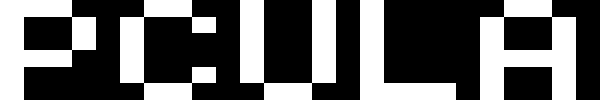

In [97]:
img.resize((600, 100))